# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

***=> To identify key drivers for used car prices, different regression models will be used to analyze the effect of specific characteristics of cars on the price they were sold for. This will enable used car dealers to judge which factors are important to maximize their profit.***

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

***=> First, all available variables will be examined in terms of their potential usefulness for influencing the price of a used car. Additionally, data quality issues (such as missing values or outliers) will be identified, and handled using appropriate methods.***

In [615]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import missingno as msno

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import set_config

In [616]:
df = pd.read_csv('data/vehicles.csv')
df.head(100)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7309798041,auburn,2100,2006.0,subaru,impreza,fair,4 cylinders,gas,97000.0,clean,automatic,NaN,NaN,NaN,hatchback,NaN,al
96,7309361405,auburn,80,2004.0,honda,NaN,excellent,6 cylinders,gas,94020.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al
97,7309271279,auburn,15990,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,gas,29652.0,clean,other,JTNKARJEXGJ517925,fwd,NaN,hatchback,blue,al
98,7309271051,auburn,20590,2013.0,acura,mdx sport utility 4d,good,6 cylinders,gas,77087.0,clean,other,2HNYD2H30DH510846,NaN,NaN,other,silver,al


In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [520]:
# Check for duplicate data entries and remove them if necessary
df.duplicated().sum()

0

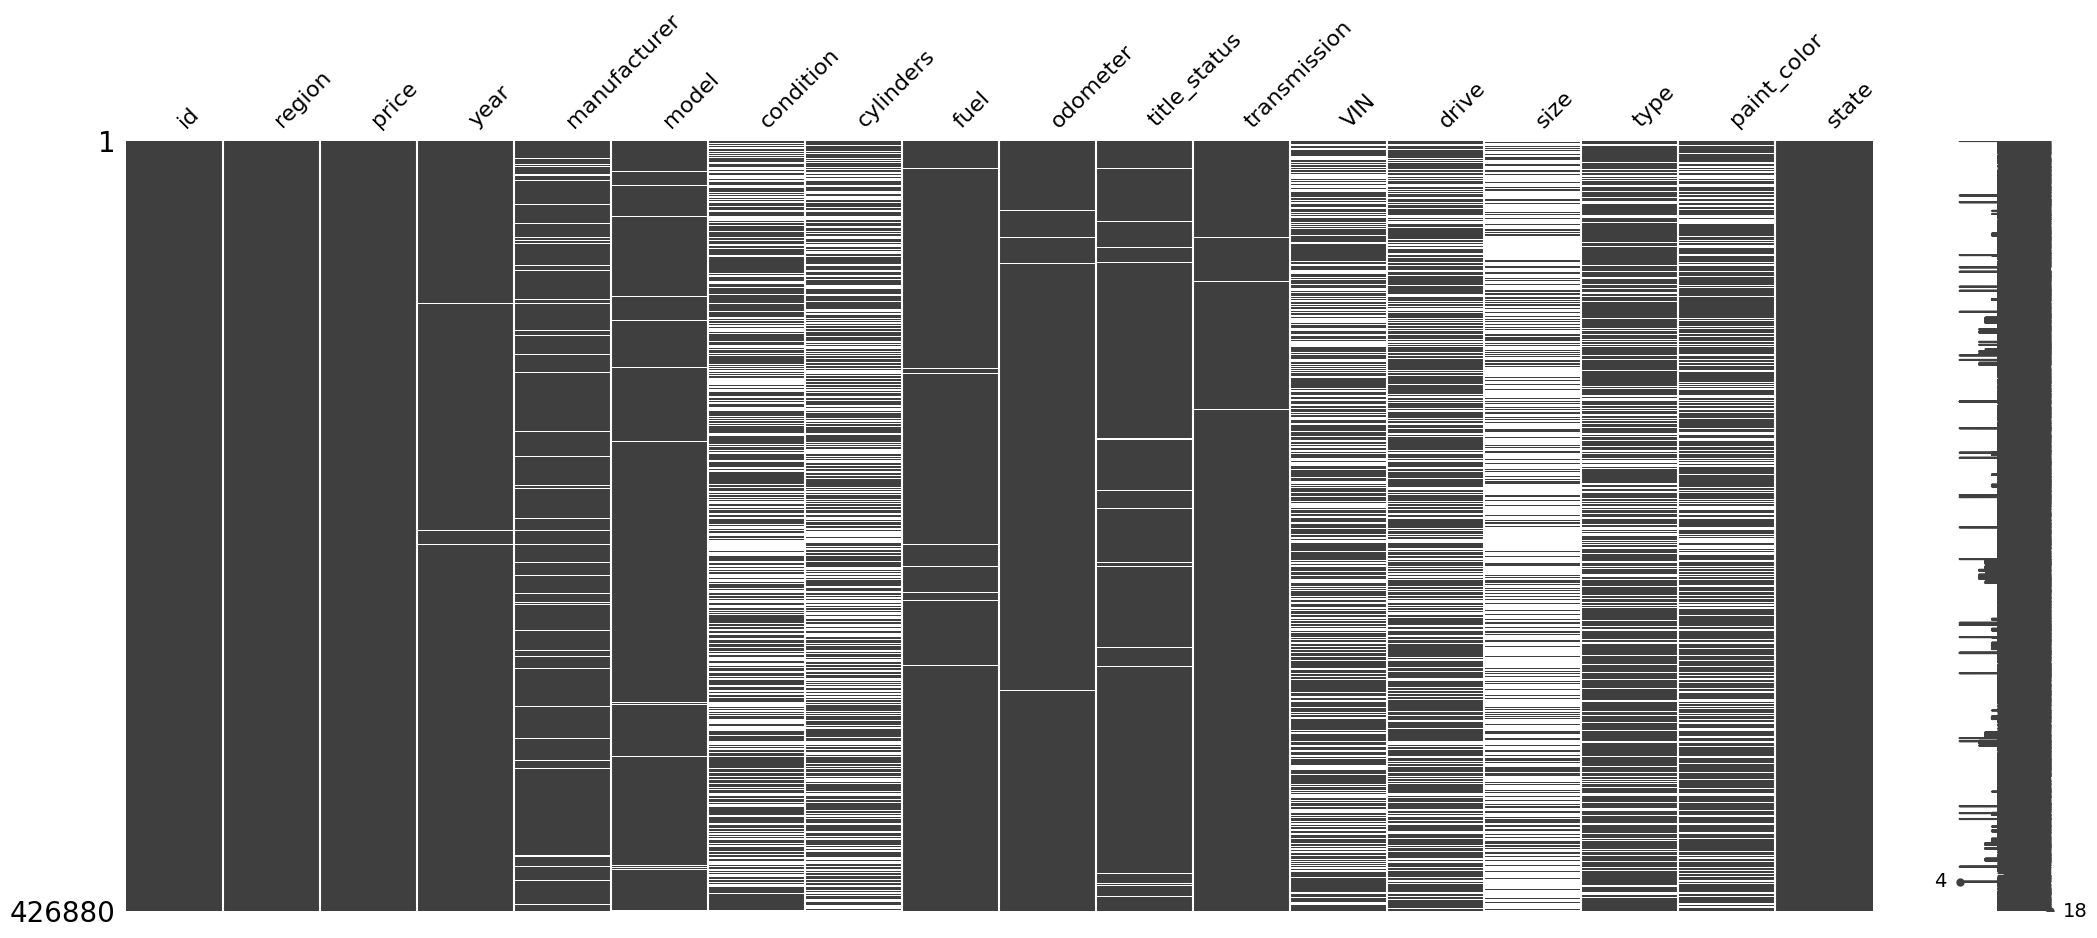

In [611]:
msno.matrix(df)
plt.show()

In [521]:
df.isna().sum()

,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


In [522]:
# Calculate percentage of missing values for each column
(df.isna().mean() * 100).round(1).sort_values(ascending=False)

,0
size,71.8
cylinders,41.6
condition,40.8
VIN,37.7
drive,30.6
paint_color,30.5
type,21.8
manufacturer,4.1
title_status,1.9
model,1.2


***=> While the main parameter of interest, car price, does not have any missing values, there are a lot of other misssing values that will need to be dealt with. For this, data entries missing values for the important parameters odometer readings and manufactoring year are dropped right away. Also, columns that are not relevant for the question of which parameters influence used car prices (for example, ID and VIN number) are excluded from the analysis.***

In [523]:
df_clean = df.drop(columns=['VIN', 'id'])
df_clean.dropna(subset=['year', 'odometer'], inplace = True)



In [524]:
df_clean.isna().sum()

,0
region,0
price,0
year,0
manufacturer,16267
model,5195
condition,170493
cylinders,174759
fuel,2172
odometer,0
title_status,7358


In [525]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421344 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        421344 non-null  object 
 1   price         421344 non-null  int64  
 2   year          421344 non-null  float64
 3   manufacturer  405077 non-null  object 
 4   model         416149 non-null  object 
 5   condition     250851 non-null  object 
 6   cylinders     246585 non-null  object 
 7   fuel          419172 non-null  object 
 8   odometer      421344 non-null  float64
 9   title_status  413986 non-null  object 
 10  transmission  419649 non-null  object 
 11  drive         292495 non-null  object 
 12  size          119732 non-null  object 
 13  type          329562 non-null  object 
 14  paint_color   293254 non-null  object 
 15  state         421344 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 54.6+ MB


In [526]:
df_clean.sample(10, random_state = 44)


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
141172,chicago,205,2017.0,volkswagen,golf alltrack,NaN,4 cylinders,gas,128261.0,clean,automatic,4wd,NaN,wagon,white,il
305640,oklahoma city,23921,2016.0,jeep,grand cherokee overland,excellent,NaN,diesel,75313.0,clean,automatic,NaN,NaN,NaN,NaN,ok
88603,"washington, DC",19990,2018.0,nissan,sentra sr turbo sedan 4d,good,NaN,gas,24273.0,clean,other,fwd,NaN,sedan,white,dc
280508,syracuse,9900,2008.0,chevrolet,silverado,good,8 cylinders,gas,195000.0,clean,automatic,4wd,full-size,truck,black,ny
43652,orange county,7900,2014.0,ford,focus only 49k miles,excellent,4 cylinders,gas,49941.0,NaN,automatic,NaN,NaN,sedan,NaN,ca
49195,reno / tahoe,35738,2015.0,chevrolet,colorado,NaN,NaN,other,73102.0,clean,automatic,4wd,NaN,pickup,NaN,ca
123967,atlanta,3999,2008.0,chrysler,sebring 4dr sedan lx f,NaN,4 cylinders,gas,143476.0,clean,automatic,fwd,NaN,sedan,NaN,ga
56546,san diego,16997,2018.0,ford,escape,NaN,NaN,gas,49315.0,clean,automatic,fwd,NaN,SUV,silver,ca
182096,baltimore,2500,2006.0,nissan,sentra,good,4 cylinders,gas,89000.0,clean,automatic,NaN,NaN,sedan,blue,md
18410,fayetteville,14988,2016.0,dodge,journey crossroad,good,NaN,other,54822.0,clean,automatic,fwd,NaN,hatchback,black,ar


In [527]:
df_clean['size'].value_counts(dropna = False)

,count
size,
NaN,301612
full-size,63141
mid-size,34337
compact,19141
sub-compact,3113


***=> The parameters size has a lot of missing values, and is probably of limited usefulness, so this column is dropped.***

In [528]:
df_clean = df_clean.drop(columns=['size'])

In [529]:
df_clean['region'].value_counts(dropna = False)

,count
region,
columbus,3608
jacksonville,3522
spokane / coeur d'alene,2985
new hampshire,2979
sarasota-bradenton,2975
...,...
meridian,28
southwest MS,14
kansas city,11


In [530]:
df_clean['state'].value_counts(dropna = False)

,count
state,
ca,49345
fl,28117
tx,22711
ny,19333
oh,17637
mi,16860
or,16732
nc,14799
pa,13626


In [531]:
df_clean['manufacturer'].value_counts(dropna = False)

,count
manufacturer,
ford,70313
chevrolet,54414
toyota,33790
honda,21026
nissan,18818
jeep,18814
ram,18227
gmc,16609
NaN,16267


In [532]:
df_clean['model'].value_counts(dropna = False)

,count
model,
f-150,7870
NaN,5195
silverado 1500,5043
1500,4178
camry,3070
...,...
es 250,1
1998 Mack,1
f-550 service truck under deck compressor,1


***=> Region, state, manufacturer and model each have a lot of categories, and are probably not very useful for this analysis, since it would be hard to give general recommendations to used car dealers based on these parameters, so they are dropped.***

In [533]:
df_clean = df_clean.drop(columns=['region', 'model', 'state', 'manufacturer'])

In [534]:
df_clean['condition'].value_counts(dropna = False)

,count
condition,
NaN,170493
good,121235
excellent,99765
like new,21178
fair,6769
new,1303
salvage,601


In [535]:
df_clean.describe()

,price,year,odometer
count,4.213440e+05,421344.000000,4.213440e+05
mean,7.598356e+04,2011.225244,9.822513e+04
std,1.226205e+07,9.463345,2.141207e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.975000e+03,2008.000000,3.795100e+04
50%,1.398800e+04,2013.000000,8.582750e+04
75%,2.649500e+04,2017.000000,1.338000e+05
max,3.736929e+09,2022.000000,1.000000e+07


***=> To be able to make predictions about used car prices that are useful to a typical used car dealer, special cases such as cars with very low or high prices and odometer readings, or very old, possibly classic, cars are excluded. Also, manufacturing year is converted to 'age' which is easier to interpret. (For price, a range of USD 800 to USD 60,000 is used, and a milage between 100 and 200,000 miles; the cutoff for age is made at 15 years). ***

In [536]:
#Remove cars with very low and high prices and mileage as well as very old cars

df_clean = df_clean.rename(columns={'year': 'age'})
df_clean['age'] = 2022 - df_clean['age'].astype(np.int32)

df_clean = df_clean[(df_clean['price']>=800) & (df_clean['price']<=60000) & (df_clean['age'] <= 15) & (df_clean['odometer'] >=100) & (df_clean['odometer'] <=200000)]

In [537]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287473 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         287473 non-null  int64  
 1   age           287473 non-null  int32  
 2   condition     176613 non-null  object 
 3   cylinders     162937 non-null  object 
 4   fuel          285638 non-null  object 
 5   odometer      287473 non-null  float64
 6   title_status  282638 non-null  object 
 7   transmission  286278 non-null  object 
 8   drive         200299 non-null  object 
 9   type          235037 non-null  object 
 10  paint_color   209273 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 25.2+ MB


In [538]:
df_clean.describe()

,price,age,odometer
count,287473.000000,287473.000000,287473.000000
mean,21070.282180,7.669096,79528.508208
std,12559.347702,3.629945,50932.262012
min,800.000000,0.000000,100.000000
25%,10500.000000,5.000000,34087.000000
50%,18900.000000,7.000000,76000.000000
75%,29990.000000,10.000000,118534.000000
max,60000.000000,15.000000,200000.000000


***=> To the data distribution in the parameters price, year and odometer readings after applying the thresholds, violinplots are used.***

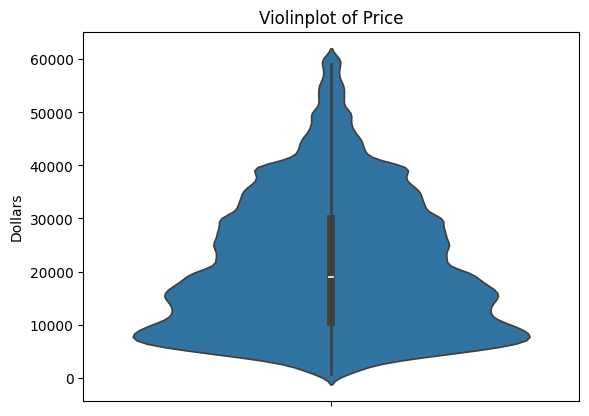

In [539]:
sns.violinplot(y='price', data=df_clean)
plt.title('Violinplot of Price')
plt.ylabel('Dollars')
plt.show()

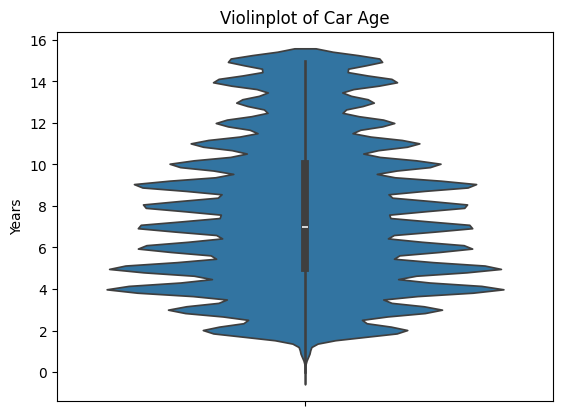

In [540]:
sns.violinplot(y='age', data=df_clean)
plt.title('Violinplot of Car Age')
plt.ylabel('Years')
plt.show()

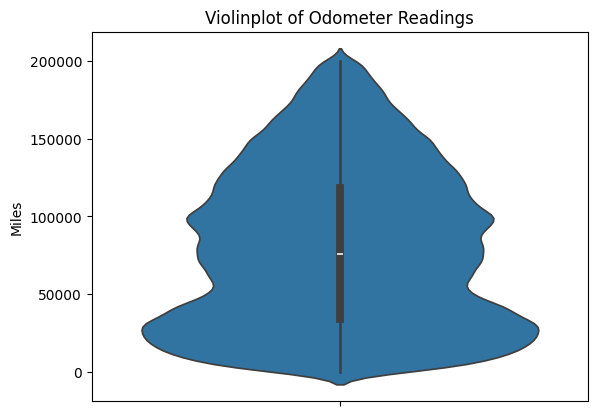

In [541]:
sns.violinplot(y='odometer', data=df_clean)
plt.title('Violinplot of Odometer Readings')
plt.ylabel('Miles')
plt.show()

***=> The upper threshold for price might still be a little too high to be relevant for a typical used car dealer, but that can be adjusted later if necessary.***

In [542]:
df_clean['type'].value_counts(dropna = False)

,count
type,
sedan,64408
SUV,54551
NaN,52436
pickup,31861
truck,19408
other,17233
hatchback,14078
coupe,12679
wagon,8093


In [543]:
df_clean['transmission'].value_counts(dropna = False)

,count
transmission,
automatic,217122
other,59158
manual,9998
NaN,1195


In [544]:
df_clean['cylinders'].value_counts(dropna = False)

,count
cylinders,
NaN,124536
6 cylinders,63857
4 cylinders,56908
8 cylinders,39485
5 cylinders,1011
other,620
10 cylinders,610
3 cylinders,405
12 cylinders,41


In [545]:
df_clean['drive'].value_counts(dropna = False)

,count
drive,
4wd,87774
NaN,87174
fwd,78421
rwd,34104


***=> Cylinders, fuel, transmission, type and drive have lots of missing values, one category that has the majorty of values and do not seem to be particularly useful, so these columns are dropped.***

In [546]:
df_clean = df_clean.drop(columns=['cylinders', 'fuel', 'transmission', 'drive', 'type'])

In [547]:
df_clean['title_status'].value_counts(dropna = False)

,count
title_status,
clean,272998
rebuilt,5847
NaN,4835
salvage,2559
lien,1146
missing,56
parts only,32


In [548]:
df_clean['paint_color'].value_counts(dropna = False)

,count
paint_color,
NaN,78200
white,56548
black,48052
silver,30649
blue,21572
red,20937
grey,17338
custom,4199
brown,4055


***=> Paint color has a lot of different categories, so the colors are summarized under four different color families.***

In [549]:
color_family_map = {
    'white': 'neutral_light',
    'black': 'neutral_dark',
    'silver': 'neutral_light',
    'blue': 'color_classic',
    'red': 'color_classic',
    'grey': 'neutral_dark',
    'brown': 'colorful',
    'green': 'colorful',
    'custom': 'colorful',
    'orange': 'colorful',
    'yellow': 'colorful',
    'purple': 'colorful'
}

df_clean['paint_color'] = df['paint_color'].replace(color_family_map)

In [550]:
df_clean['paint_color'].value_counts(dropna = False)

,count
paint_color,
neutral_light,87197
NaN,78200
neutral_dark,65390
color_classic,42509
colorful,14177


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

***=> To decide how to handle missing values in the remaining columns, the percentage of missing values per column will be calculated again, and a plot illustrating the distribution of missing values accross data rows and columns will be used.***

In [551]:
# Calculate percentage of missing values for each column
(df_clean.isna().mean() * 100).round(1).sort_values(ascending=False)

,0
condition,38.6
paint_color,27.2
title_status,1.7
price,0.0
age,0.0
odometer,0.0


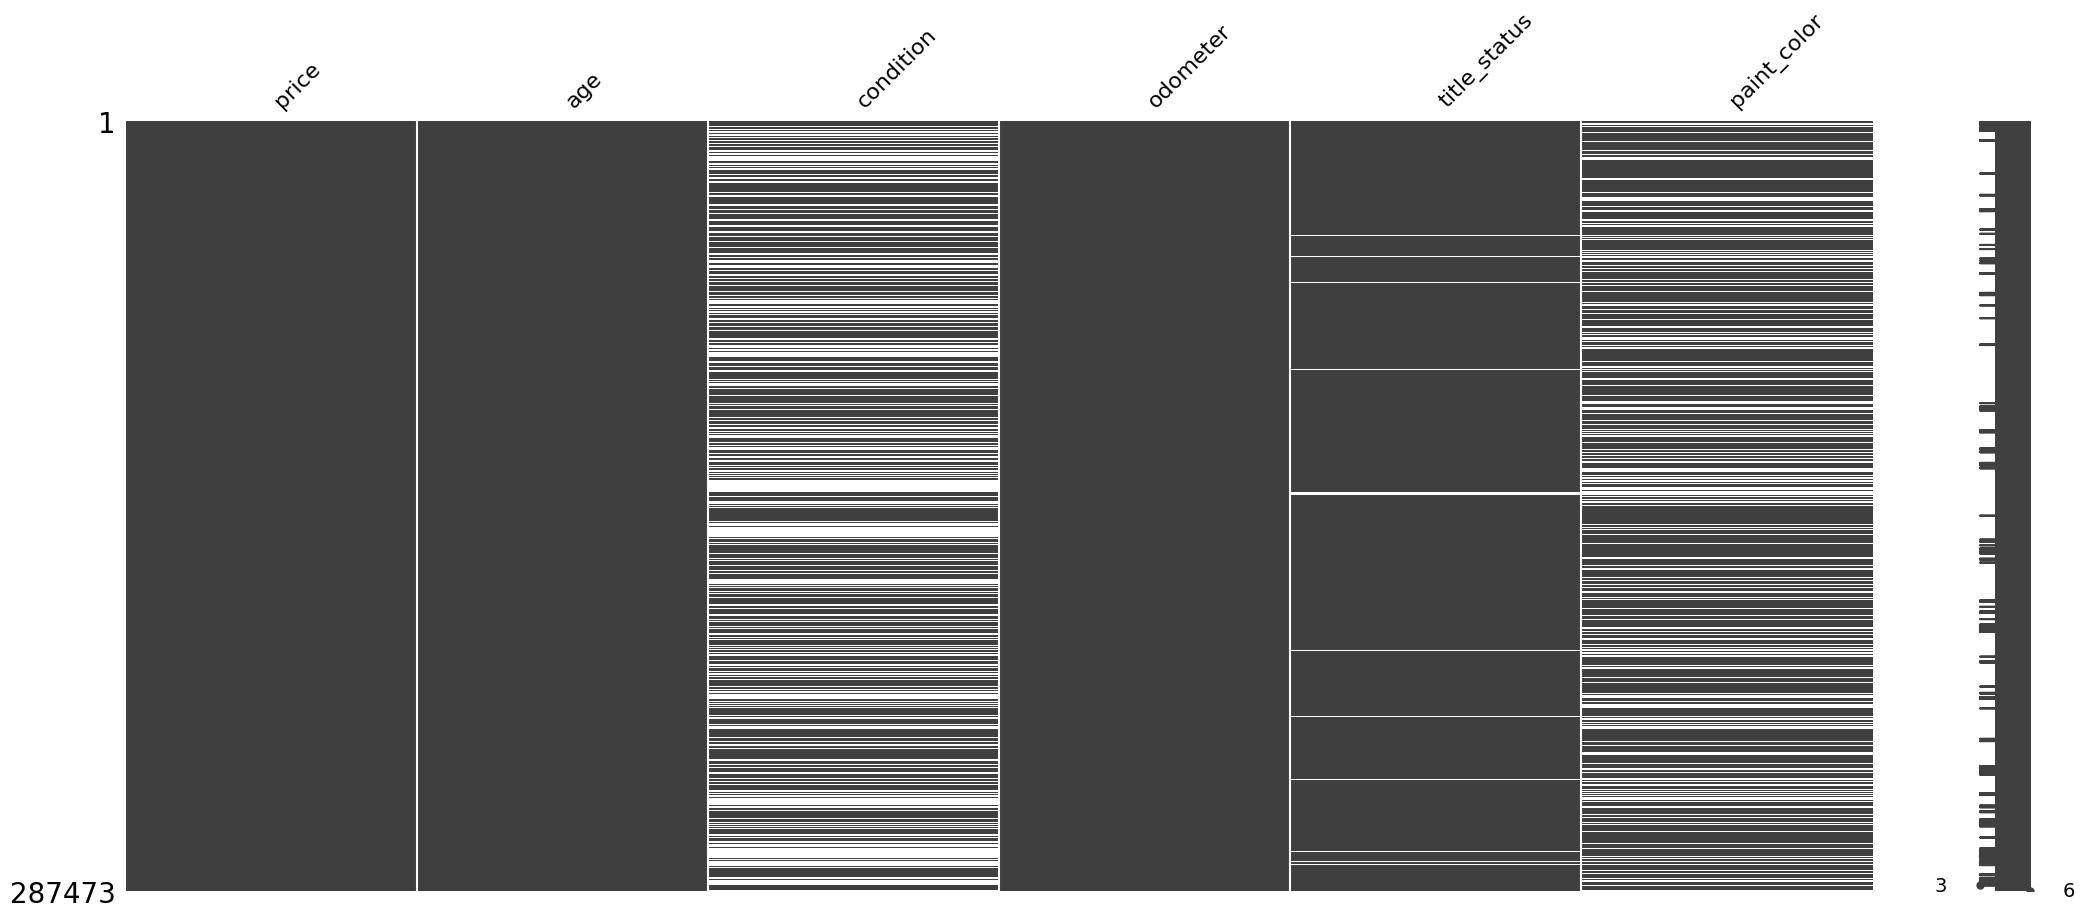

In [552]:
  msno.matrix(df_clean)
  plt.show()

***=> While dropping the rows with missing values for condition, type and paint color considerably reduces the number of data entries, these parameters seem sufficiently important to run the most accurate analysis. It seems unlikely that there is a good method to estimate and then fill the missing values, so the entries missing these parameters are removed from the analysis.***

In [553]:
# Remove rows with missing values
df_clean.dropna(inplace = True)




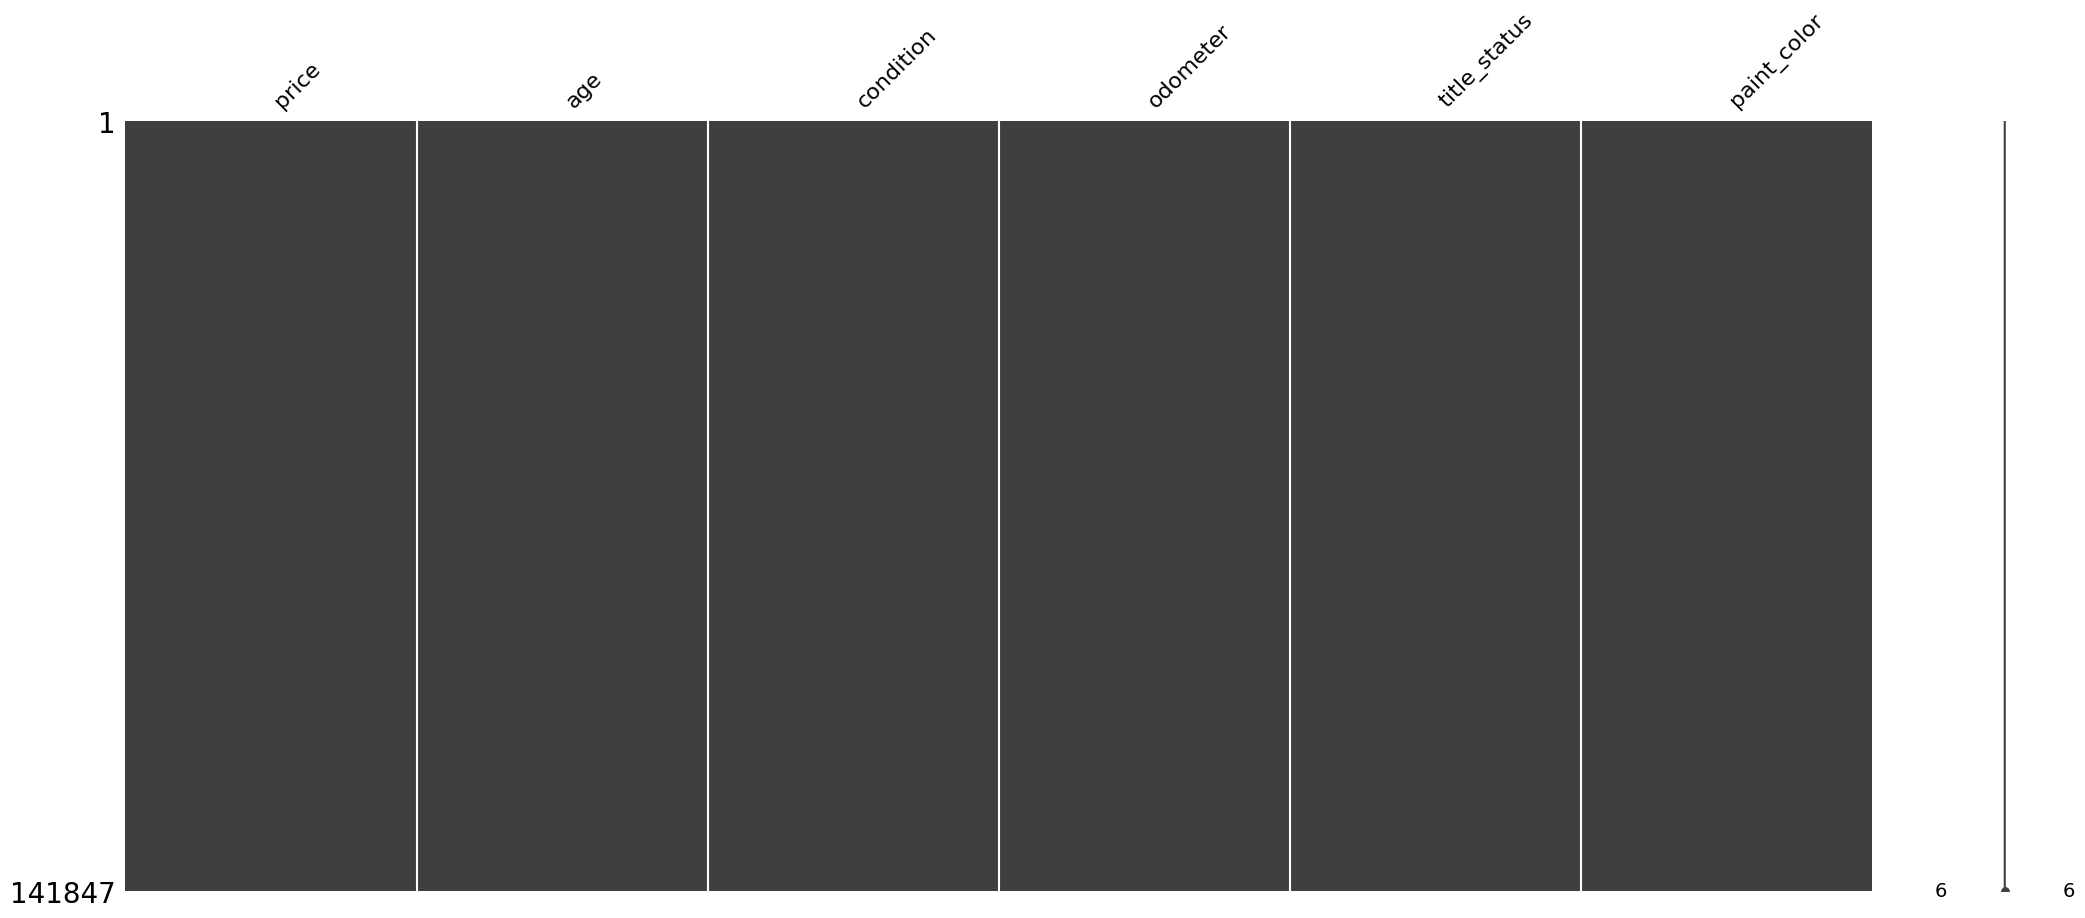

In [554]:
  msno.matrix(df_clean)
  plt.show()

In [555]:
print(round(((len(df_clean)/len(df))*100),1),'% of entries of the original dataset are analyzed after data clean up.')

33.2 % of entries of the original dataset are analyzed after data clean up.


***=> Check for the expected positive correlation between price and newer cars and negative correlation between price and higher odometer readings in the cleaned up dataset.***

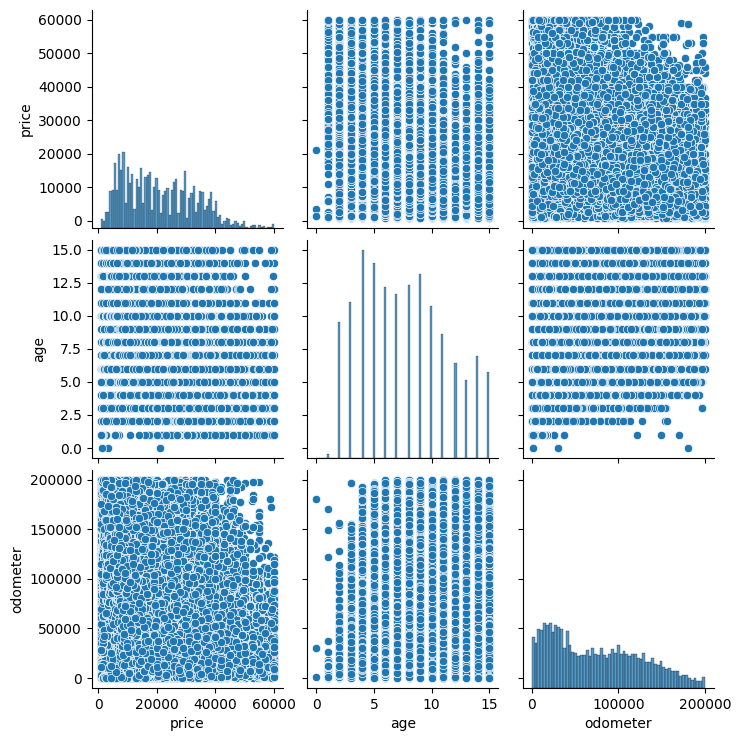

In [556]:
sns.pairplot(df_clean)

<Axes: >

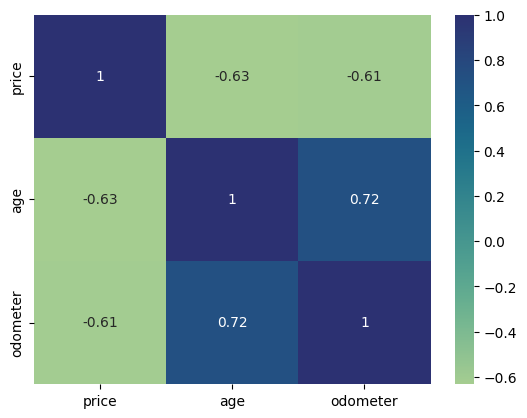

In [557]:
corr = df_clean.corr(numeric_only = True)
sns.heatmap(data = corr, annot = True, cmap="crest")

***=> While the expected correlations between price and age/odometer reading are present, they are not very strong, which indicates that additional parameters may influence price (which, hopefully, includes some of the categorial variables present in the dataset).***

***=> Next the dataset is split into train and test sets.***

In [558]:
df_clean_X = df_clean.drop(['price'], axis = 1)
df_clean_y = df_clean['price']
df_clean_X_train, df_clean_X_test, df_clean_y_train, df_clean_y_test = train_test_split(df_clean_X, df_clean_y, test_size = 0.3, random_state = 31)

print(df_clean_X_train.shape)
print(df_clean_X_test.shape)
print(df_clean_y_train.shape)
print(df_clean_y_test.shape)

(99292, 5)
(42555, 5)
(99292,)
(42555,)


\***=> The next step is to make a Column Transformer which will be used to convert ordinal and categorial variables and to add polynomial feature for numerical variables.***

In [576]:
# Variables are processed according to their datatype

# for numerical columns polynomial features are added and the values are scaled
numeric_cols = ['odometer', 'age']
numeric_transformer = Pipeline(steps=[('polyfeatures', (PolynomialFeatures(degree=3, include_bias=False))), ('scaler', StandardScaler())])

# ordinal columns are encoded
ord_cols = ['condition', 'title_status']
ord_encoder = OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new'],
                                         ['salvage', 'parts only', 'rebuilt', 'lien', 'clean']], handle_unknown = 'use_encoded_value', unknown_value = -1)


cat_cols = ['paint_color']
cat_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown= 'ignore', sparse_output=False))])

column_transformer = ColumnTransformer(transformers=[('numerical', numeric_transformer, numeric_cols), ('ordinal', ord_encoder, ord_cols), ('categorial', cat_transformer, cat_cols)])
column_transformer
# column_transformer.fit_transform(df_clean_X_train)
# column_transformer.fit_transform(df_clean_X_test)


ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('polyfeatures',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['odometer', 'age']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['salvage', 'fair',
                                                             'good',
                                                             'excellent',
                                                             'like new',
                                                             'new'],
                                                            ['salvage',
                                                             'parts only',
                                                             'rebuilt', 'lien',
                                                             'clean']],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['condition', 'title_status']),
                                ('categorial',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['paint_color'])])

In [560]:
# column_transformer.get_feature_names_out()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

***=> First, a function is defined which helps compare the scores and errors for the different models that will be tested.***

In [577]:
# Function printing score and RMSE for each model (the RMSE rather than the MSE was chosen so that the error and the target variable price have the same unit)
def score_and_rmse(pipeline):
    print('Training Score: ', round((pipeline.score(df_clean_X_train, df_clean_y_train)),2))
    print('Test Score: ', round((pipeline.score(df_clean_X_test, df_clean_y_test)),2))
    print('Training RMSE: ', round(np.sqrt(mean_squared_error(df_clean_y_train, pipeline.predict(df_clean_X_train))), 2))
    print('Test RMSE: ', round(np.sqrt(mean_squared_error(df_clean_y_test, pipeline.predict(df_clean_X_test))),2))

***=>  The first model that is fitted is a simple linear regression model only including the most important parameters age and odometer to get a baseline to which more complicated models can be compared later.***

In [578]:
df_clean_X_train_simple = df_clean_X_train[['age', 'odometer']]
df_clean_X_test_simple = df_clean_X_test[['age', 'odometer']]

linreg_pipe_simple = Pipeline([('scaler', StandardScaler()), ('linear_regression', LinearRegression())])
linreg_pipe_simple.fit(df_clean_X_train_simple, df_clean_y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [582]:
    print('Training Score: ', round((linreg_pipe_simple .score(df_clean_X_train_simple, df_clean_y_train)),2))
    print('Test Score: ', round((linreg_pipe_simple .score(df_clean_X_test_simple, df_clean_y_test)),2))
    print('Training RMSE: ', round(np.sqrt(mean_squared_error(df_clean_y_train, linreg_pipe_simple.predict(df_clean_X_train_simple))), 2))
    print('Test RMSE: ', round(np.sqrt(mean_squared_error(df_clean_y_test, linreg_pipe_simple.predict(df_clean_X_test_simple))),2))

Training Score:  0.45
Test Score:  0.45
Training RMSE:  8937.61
Test RMSE:  9004.68


***=> Next, a linear regression model is fitted using all remaining parameters and polynomial features.***

In [583]:
linreg_pipe = Pipeline([('transformer', column_transformer), ('linear_regression', LinearRegression())])
linreg_pipe.fit(df_clean_X_train, df_clean_y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('polyfeatures',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['odometer', 'age']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new'],
                                                                             ['salvage',
                                                                              'parts '
                                                                              'only',
                                                                              'rebuilt',
                                                                              'lien',
                                                                              'clean']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['condition',
                                                   'title_status']),
                                                 ('categorial',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['paint_color'])])),
                ('linear_regression', LinearRegression())])

In [584]:
score_and_rmse(pipeline = linreg_pipe)

Training Score:  0.48
Test Score:  0.48
Training RMSE:  8684.23
Test RMSE:  8761.55


***=> Adding more features to the linear regression model did improve model performance.***

***=> Next, a Ridge model with default alpha is fitted.***

In [585]:
ridge_default_pipe = Pipeline([('transformer', column_transformer), ('ridge', Ridge())])
ridge_default_pipe.fit(df_clean_X_train, df_clean_y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('polyfeatures',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['odometer', 'age']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new'],
                                                                             ['salvage',
                                                                              'parts '
                                                                              'only',
                                                                              'rebuilt',
                                                                              'lien',
                                                                              'clean']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['condition',
                                                   'title_status']),
                                                 ('categorial',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['paint_color'])])),
                ('ridge', Ridge())])

In [586]:
score_and_rmse(pipeline = ridge_default_pipe)

Training Score:  0.48
Test Score:  0.48
Training RMSE:  8684.26
Test RMSE:  8761.57


***=> Then a ridge model with in which the alpha is optimized via Grid Search is fitted.***

In [587]:
ridge_alphas = {'ridge__alpha': np.logspace(-8, 8, 10)}

ridge_optimal_pipe = Pipeline([('transformer', column_transformer), ('ridge', Ridge())])
grid_search = GridSearchCV(ridge_optimal_pipe, param_grid = ridge_alphas, scoring = 'neg_mean_squared_error')
grid_search.fit(df_clean_X_train, df_clean_y_train)

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('polyfeatures',
                                                                                          PolynomialFeatures(degree=3,
                                                                                                             include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['odometer',
                                                                          'age']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(categories=[['salvage',
                                                                                                     'fair',
                                                                                                     'good',
                                                                                                     'excellent',
                                                                                                     'like '
                                                                                                     'new',
                                                                                                     'new'],
                                                                                                    ['salvage',
                                                                                                     'parts '
                                                                                                     'only',
                                                                                                     '...
                                                                        ('categorial',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['paint_color'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([1.00000000e-08, 5.99484250e-07, 3.59381366e-05, 2.15443469e-03,
       1.29154967e-01, 7.74263683e+00, 4.64158883e+02, 2.78255940e+04,
       1.66810054e+06, 1.00000000e+08])},
             scoring='neg_mean_squared_error')

In [588]:
# Best ridge alpha
grid_search.best_params_

{'ridge__alpha': 0.12915496650148828}

In [589]:
score_and_rmse(pipeline = grid_search.best_estimator_)

Training Score:  0.48
Test Score:  0.48
Training RMSE:  8684.23
Test RMSE:  8761.55


***Next, a Lasso regression is fitted.***

In [590]:
lasso_pipe = Pipeline([('transformer', column_transformer), ('lasso', Lasso(max_iter=10000, random_state = 42))])
lasso_pipe.fit(df_clean_X_train, df_clean_y_train)
lasso_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('polyfeatures',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['odometer', 'age']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new'],
                                                                             ['salvage',
                                                                              'parts '
                                                                              'only',
                                                                              'rebuilt',
                                                                              'lien',
                                                                              'clean']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['condition',
                                                   'title_status']),
                                                 ('categorial',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['paint_color'])])),
                ('lasso', Lasso(max_iter=10000, random_state=42))])

In [591]:
score_and_rmse(pipeline = lasso_pipe)

Training Score:  0.48
Test Score:  0.48
Training RMSE:  8685.71
Test RMSE:  8762.98


In [596]:
# Extract coefficients
lasso_coefs = lasso_pipe.named_steps['lasso'].coef_

# Identify non-zero coefficients
selected_features_mask = lasso_coefs != 0

# Get all feature names
column_transformer.fit_transform(df_clean_X_train)
all_feature_names = column_transformer.get_feature_names_out()

# Selected feature names
selected_feature_names = [feature for feature, selected in zip(all_feature_names, selected_features_mask) if selected]

Features_df = pd.DataFrame({'All features': all_feature_names})
print(Features_df)

Lasso_df = pd.DataFrame({'Selected Features': selected_feature_names, 'Coefficients': lasso_coefs})

Lasso_df

                             All features
0                     numerical__odometer
1                          numerical__age
2                   numerical__odometer^2
3                 numerical__odometer age
4                        numerical__age^2
5                   numerical__odometer^3
6               numerical__odometer^2 age
7               numerical__odometer age^2
8                        numerical__age^3
9                      ordinal__condition
10                  ordinal__title_status
11  categorial__paint_color_color_classic
12       categorial__paint_color_colorful
13   categorial__paint_color_neutral_dark
14  categorial__paint_color_neutral_light


,Selected Features,Coefficients
0,numerical__odometer,536.144597
1,numerical__age,-6712.381201
2,numerical__odometer^2,590.716058
3,numerical__odometer age,-19354.358742
4,numerical__age^2,9410.806697
5,numerical__odometer^3,5045.721116
6,numerical__odometer^2 age,-4053.703796
7,numerical__odometer age^2,13014.230238
8,numerical__age^3,-5744.178251
9,ordinal__condition,-794.592890


***=> The Lasso regression did not select features, so next a Sequential Feature Selector using Linear Regression as selector is used.***

In [600]:
sequential_pipe = Pipeline([('transformer', column_transformer),
                           ('selector', SequentialFeatureSelector(LinearRegression(),
                                                                  n_features_to_select=7)),
                           ('linreg', LinearRegression())])
sequential_pipe.fit(df_clean_X_train, df_clean_y_train)

sequential_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('polyfeatures',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['odometer', 'age']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new'],
                                                                             ['salvage',
                                                                              'parts '
                                                                              'only',
                                                                              'rebuilt',
                                                                              'lien',
                                                                              'clean']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['condition',
                                                   'title_status']),
                                                 ('categorial',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['paint_color'])])),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=7)),
                ('linreg', LinearRegression())])

In [601]:
score_and_rmse(pipeline = sequential_pipe)

Training Score:  0.48
Test Score:  0.48
Training RMSE:  8708.82
Test RMSE:  8785.72


In [602]:
sequential_pipe[:-1].get_feature_names_out()

array(['numerical__age', 'numerical__odometer age',
       'numerical__odometer^3', 'numerical__odometer^2 age',
       'numerical__odometer age^2', 'ordinal__condition',
       'ordinal__title_status'], dtype=object)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

***=> Here is a summary of the scores of the models that were tested:***

| Test Type | Training Score | Test Score| Training RMSE | Test RMSE |
| ----------| ---------- | ----- | --------------- | ---------------- |
| Linear Regression with Two Features (Age, Odometer) | 0.45 | 0.45  | 8937.61 | 9004.68 |
| Linear Regression with Polynomial Features | 0.48 | 0.48 | 8684.23| 8761.55 |
|Ridge Regression with Default Alpha | 0.48 | 0.48  | 8684.26 | 8761.57 |
| Ridge Regression with Optimized Alpha | 0.48 | 0.48 | 8684.23 | 8761.55 |
| Lasso Regression| 0.48  | 0.48 | 8685.71  | 8762.98 |
| Sequential Feature Selection | 0.48 | 0.48  | 8708.82 | 8785.72 |

***=> After polynomial features and parameters about condition, color and title status were added, all tested models performed similarly. The test scores indidcate that additional parameters that were not included in the analysis might play a role in determining the sales price of used cars.***

***=> To illustrate how the different features impact car price, plots of the coefficients will be generated for the folowing two models:***

1.   Linear Regression with Polynomial Features, which had the lowest training and test RMSE (together with the Ridge Regressing with an optimized alpha)
2.   Sequential Feature Selection linear regression model which selected the seven most relevant features

In [609]:
linreg_pipe_feature_names = linreg_pipe[:-1].get_feature_names_out()
linreg_pipe_coefficients = linreg_pipe.named_steps['linear_regression'].coef_
linreg_pipe_coef_df = pd.DataFrame({'Feature': linreg_pipe_feature_names, 'Coefficient': linreg_pipe_coefficients}).sort_values(by='Coefficient')
linreg_pipe_coef_df


,Feature,Coefficient
3,numerical__odometer age,-24236.896165
8,numerical__age^3,-10472.156460
1,numerical__age,-8775.135267
6,numerical__odometer^2 age,-5055.015433
9,ordinal__condition,-793.645023
11,categorial__paint_color_color_classic,-577.146942
12,categorial__paint_color_colorful,-488.947087
13,categorial__paint_color_neutral_dark,270.090024
14,categorial__paint_color_neutral_light,796.004005
2,numerical__odometer^2,1602.045938


[Text(0.5, 1.0, 'Impact of Features on Used Car Price')]

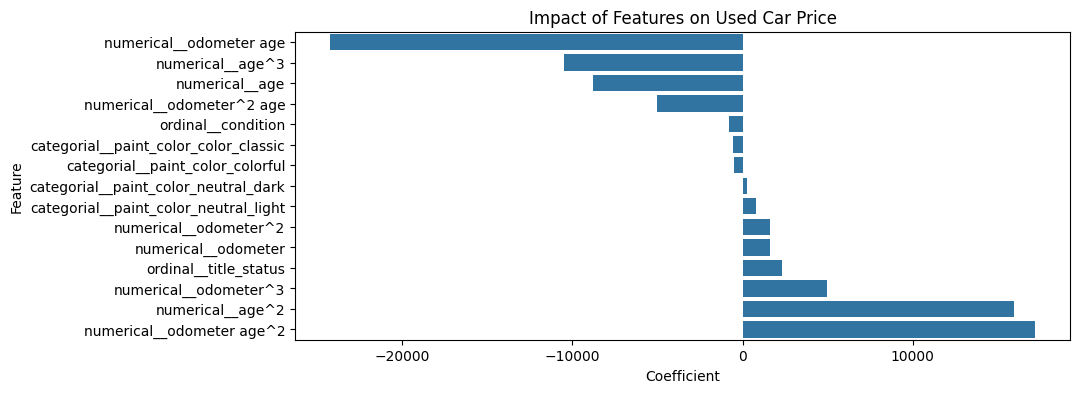

In [613]:
plt.figure(figsize = (10, 4))
plot = sns.barplot(data = linreg_pipe_coef_df, x = 'Coefficient', y = 'Feature')
plot.set(title = 'Impact of Features on Used Car Price')

***=> As expected, age and odometer reading, and polynomial features created based on these two parameters, have the strongest impact on used car price. After that, title status is the factor with the next largest influence, while the condition of the cars has a surprisingly weak effect. The overall effect of paint color on car price is weak, but it seems that neutral colors (mainly white and silver) have a slightly positive impact on car price whereas colorful paint has a slightly negative influence.***

In [606]:
sequential_feature_names = sequential_pipe[:-1].get_feature_names_out()
sequential_coefficients = sequential_pipe.named_steps['linreg'].coef_
sequential_coef_df = pd.DataFrame({'Feature': sequential_feature_names, 'Coefficient': sequential_coefficients}).sort_values(by='Coefficient')
sequential_coef_df

,Feature,Coefficient
1,numerical__odometer age,-16570.594648
3,numerical__odometer^2 age,-4867.780683
0,numerical__age,-3119.657830
5,ordinal__condition,-787.986831
6,ordinal__title_status,2345.954934
2,numerical__odometer^3,5691.887822
4,numerical__odometer age^2,11683.796312


[Text(0.5, 1.0, 'Impact of Features on Used Car Price')]

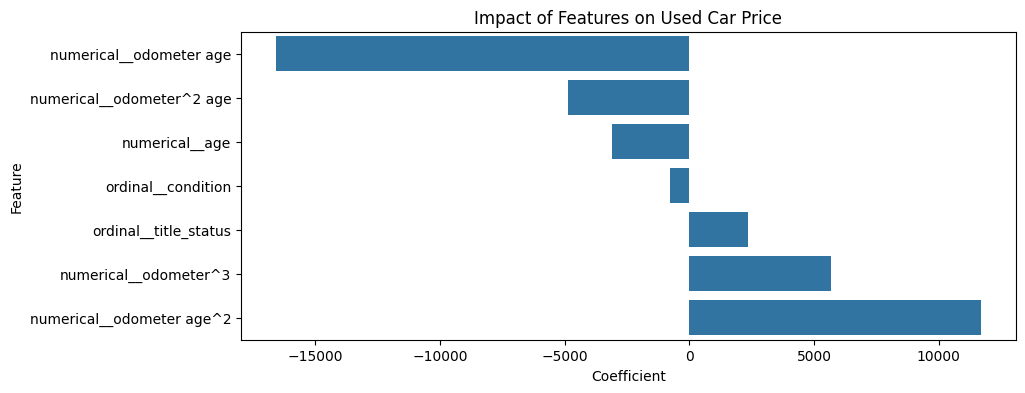

In [607]:
plt.figure(figsize = (10, 4))
plot = sns.barplot(data = sequential_coef_df, x = 'Coefficient', y = 'Feature')
plot.set(title = 'Impact of Features on Used Car Price')

***=> Apart from the most important features age and odometer readings, and their derivates, also title status was included in the top seven features.***

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

***=> The analysis clearly showed that car age and odometer readings have a strong impact on the price of used cars. Title status also seems to be an important factor, whereas the condition of the cars had a surprisingly weak influence.
The effect of paint color on car price was not strong, but it seems that neutral colors (particularly, white and silver) are preferable over more colorful paints.
Based on this analysis, it would be best to stock cars that were manufactored recently and have a low mileage with a clean title status and are painted in neutral light colors.***